I will use the data set found here: https://archive.ics.uci.edu/dataset/109/wine.

I will follow the process outlined here: https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf.

Notes about the data set: It has 13 features of which Magnesium and Proline are integers and the rest are continuous. It also contains a categorical target column 'Class' which takes on three values

Before that, I will do a demonstration of the LLE (Local Linear Embedding) method for a two-dimensional manifold in three dimensional space for which this method is particularly suited. However, the shape I will choose is a sphere. It is unclear to me what the reduction should look like. Indeed, the torus is a particularly challenging application for dimensionality reduction (see: https://arxiv.org/abs/2110.04758) because it is both multivariate and circular. I think the sphere, while more common, will also create some similar problems to a torus because it is also multivariate and circular. Namely, it is not clear how to choose a mapping in lower dimensions that consistently preserves the desired distance relationships between different pairs of points. 

I think using a sphere as a test case for LLE will give me insights into how LLE handles non-linear structures. However, a sphere and a torus have distinct topological properties, so the results might not be directly comparable.

Generating the data by sampling from the manifold:

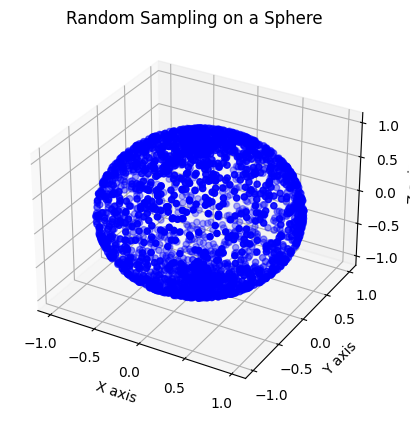

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points to sample
num_points = 2500

# Generate random angles
theta = np.random.uniform(0, np.pi, num_points)  # Angle from z-axis
phi = np.random.uniform(0, 2*np.pi, num_points)  # Rotation around z-axis

# Convert spherical coordinates to Cartesian coordinates for a unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Random Sampling on a Sphere')
plt.show()

Now, we have our three columns, x, y, and z representing data for a three dimensional unit sphere centered at (0,0,0). We can use LLE to attempt to find a nice representation in two dimensions.

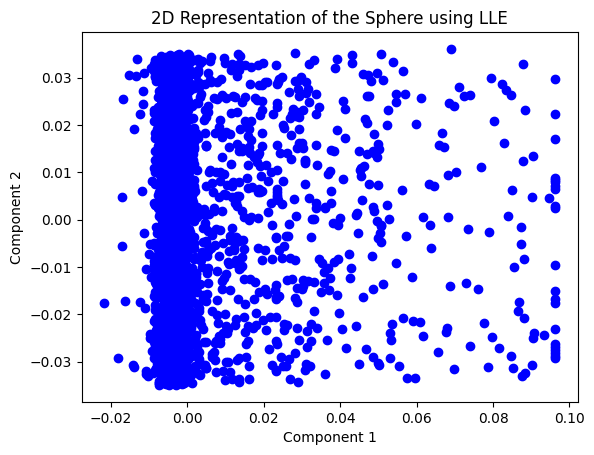

In [2]:
from sklearn.manifold import LocallyLinearEmbedding

# Stack the coordinates into a 3D array
X = np.vstack([x, y, z]).T

# Create an LLE model
n_neighbors = 5  # Number of neighbors to consider, starting with five
n_components = 2   # Number of dimensions for the output
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)

# Fit and transform the data
X_lle = lle.fit_transform(X)

# Plotting the 2D representation
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c='blue', marker='o')
plt.title('2D Representation of the Sphere using LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

However, to get a more useful interpretation, we need to impose some sense on the sphere of what it means for points to be "close" to each other. The most sensible is to pick one point and then color other points based on how far they are from the initial point in a traditional Euclidean sense. However, this gets at one of the main problems when attempting to interpret circular multivariate data in this manner, which is that there is no reason to prefer any particular point of reference. With that being said, since this is just an experiment to gain some intuition about LLE, I will choose the "top", i.e., (x,y,z) = (0,0,1), of the sphere as the point of reference.

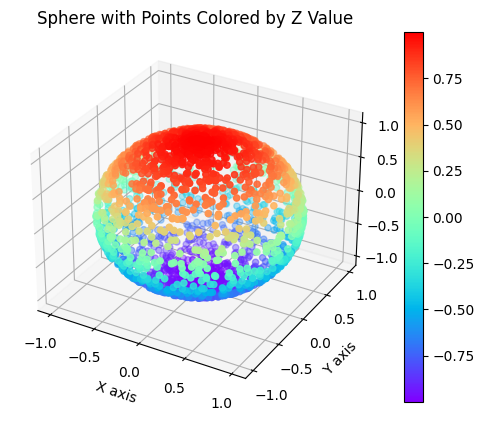

In [3]:
# Plotting with colors based on z-value
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=z, cmap='rainbow', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Sphere with Points Colored by Z Value')
plt.colorbar(scatter)  # Adds a color bar to interpret the colors
plt.show()

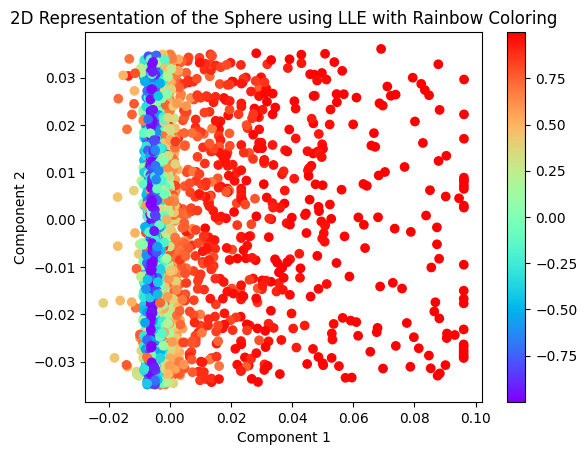

In [4]:
# Plotting the 2D representation, preserving the rainbow coloring based on z-value
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=z, cmap='rainbow', marker='o')
plt.colorbar()  # Add a color bar for reference
plt.title('2D Representation of the Sphere using LLE with Rainbow Coloring')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

With these parameters, LLE outputs vastly different shapes randomly from run to run. Thus, it is meaningless to draw any sort of conclusion. Sometimes the dots are in a straight line. Sometimes, they are in a squished triangle such as would be created in the gap between three circles touching each other. Sometimes, the dots are mostly in a line with some extending from the line in a second, smaller line. Sometimes the reds are very spread out while every other color is stacked on top of each other in a tight vertical line near the left. There is a huge amount of variation. I'm going to try a higher k value to tune the model for less variance in output. Then, I'm going to use a random seed for reproducibility going forward.

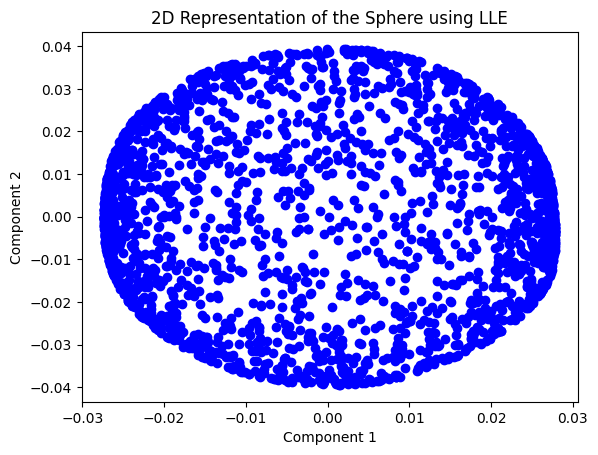

In [5]:
from sklearn.manifold import LocallyLinearEmbedding

# Stack the coordinates into a 3D array
X = np.vstack([x, y, z]).T

# Create an LLE model
n_neighbors = 100  # Number of neighbors to consider, trying 100 to see if it reduces the variance
n_components = 2   # Number of dimensions for the output
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)

# Fit and transform the data
X_lle = lle.fit_transform(X)

# Plotting the 2D representation
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c='blue', marker='o')
plt.title('2D Representation of the Sphere using LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Now, the variance of LLE is reduced. In fact, we get a much more reasonable circular interpretation of the sphere. This is an example of the usefulness of hyperparameter tuning. Let's add in our coloring and seed.

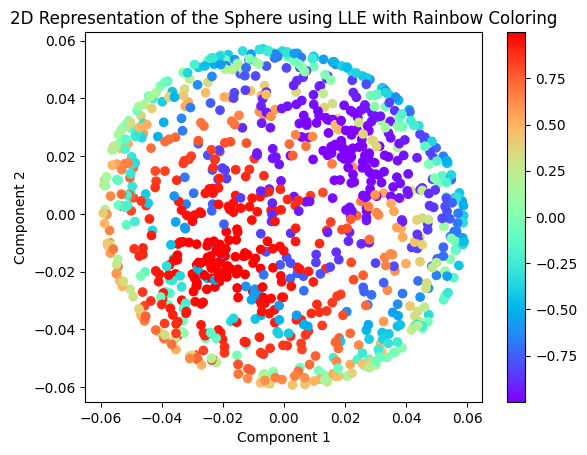

In [6]:
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate the original 3D sphere data
num_points = 1000
theta = np.random.uniform(0, np.pi, num_points)
phi = np.random.uniform(0, 2 * np.pi, num_points)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Stack the coordinates into a 3D array
X = np.vstack([x, y, z]).T

# Create an LLE model with a fixed random state
n_neighbors = 100  # Number of neighbors to consider
n_components = 2   # Number of dimensions for the output
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)

# Fit and transform the data
X_lle = lle.fit_transform(X)

# Plotting the 2D representation, preserving the rainbow coloring based on z-value
plt.figure()
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=z, cmap='rainbow', marker='o')
plt.colorbar()  # Add a color bar for reference
plt.title('2D Representation of the Sphere using LLE with Rainbow Coloring')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In this code, np.random.seed(42) sets the seed for NumPy's random number generator, ensuring that the random numbers (here, the angles theta and phi) are the same every time the script is run, and LocallyLinearEmbedding(..., random_state=42) sets the seed for the random processes inside LLE, ensuring consistent results across runs.

As we can see, the red points are closer together, and the purple points are closer together, which makes sense because these colors represented points near the top and bottom of the sphere. Meanwhile, the green and light blue points are spread around the edges of the circle, which also makes sense.

With that being said, we will demonstrate the algorithm for the wine data set. The expected performance is low because this data set has much more noise and does not necessarily follow a manifold, which LLE is most suited to. However, our goal is to figure out if there is some manifold-like structure in the data. I will use a random seed for reproducibility this time.

In [7]:
import pandas as pd

# URL for the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column names for the Wine dataset as described in the dataset description
columns = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

# Load the dataset into a pandas DataFrame
wine_df = pd.read_csv(url, header=None, names=columns)

wine_df.head()  # Display the first few rows of the DataFrame

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


For this unsupervised method, we are merely attempting to simplify the data. So, we will not be inputting the class labels into our LLE model. The goal is to find a visualization of the features in two dimensional space. However, this time, instead of using z to create our coloring, which is a bit arbitrary as described before due to the circular multivariate nature of the data, we can use class labels to generate a much more meaningful coloring. If the method effectively captures some relationship between the classes in two dimensions, we would expect to see some kind of nice separation in the class labels preserved in two dimensions. We will compare LLE and PCA.

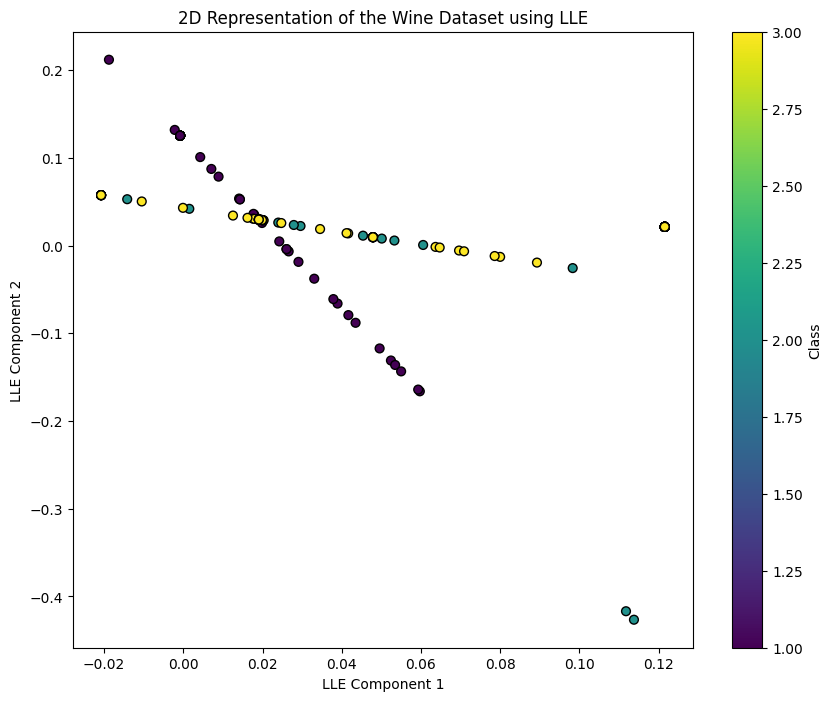

In [8]:
# Apply Locally Linear Embedding (LLE) to reduce the dataset to 2 dimensions
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard', random_state=42)
X_lle = lle.fit_transform(wine_df.iloc[:, 1:])  # Exclude the class label for LLE

# Plotting the 2D representation of the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=wine_df['Class'], cmap='viridis', edgecolor='k', s=40)
plt.colorbar(label='Class')
plt.title('2D Representation of the Wine Dataset using LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()

To interpret these results effectively, I need a clear understanding of how LLE reduces dimensions while preserving the neighborhood structure.

To accomplish this, I will carefully study this paper: https://websites.umich.edu/~yritov/lle1.pdf.

While doing my research, I realized that I should set the number of neighbors to be a little larger than the number of samples in each class and also increase max_iter (https://stackoverflow.com/questions/42275922/setting-the-parameters-of-locally-linear-embedding-lle-method-in-scikit-learn).

In [9]:
# Count the number of samples in each class in the Wine dataset
class_counts = wine_df['Class'].value_counts()
class_counts

Class
2    71
1    59
3    48
Name: count, dtype: int64

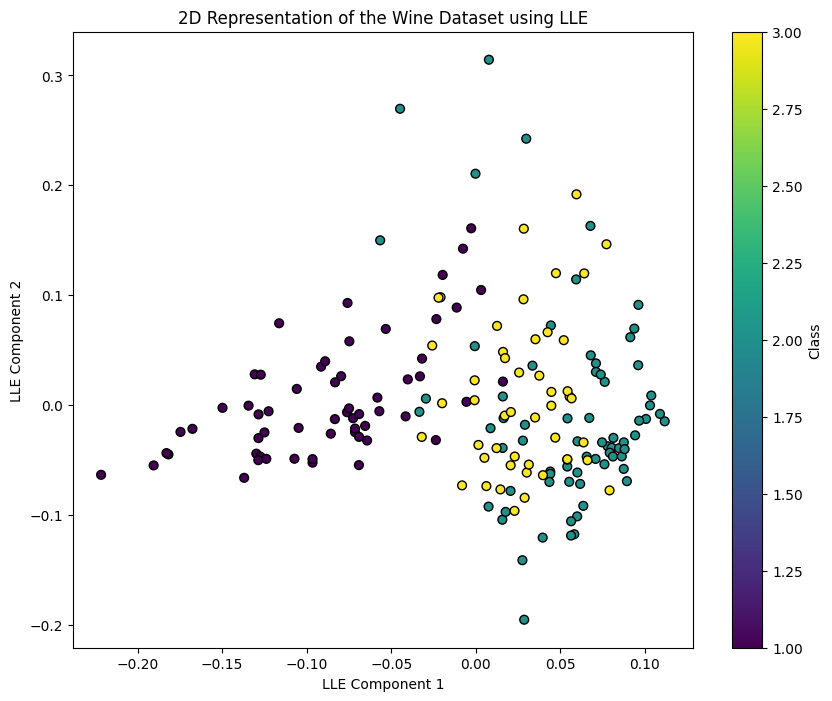

In [10]:
# Applying again with tuned n_neighbors and max_iter
lle = LocallyLinearEmbedding(n_neighbors=75, n_components=2, method='standard', max_iter = 1000, random_state=42)
X_lle = lle.fit_transform(wine_df.iloc[:, 1:])  # Exclude the class label for LLE

# Plotting the 2D representation of the dataset
plt.figure(figsize=(10, 8))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=wine_df['Class'], cmap='viridis', edgecolor='k', s=40)
plt.colorbar(label='Class')
plt.title('2D Representation of the Wine Dataset using LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()

It still seems like classes two and three overlap pretty strongly, while class three is fairly distinct from both.

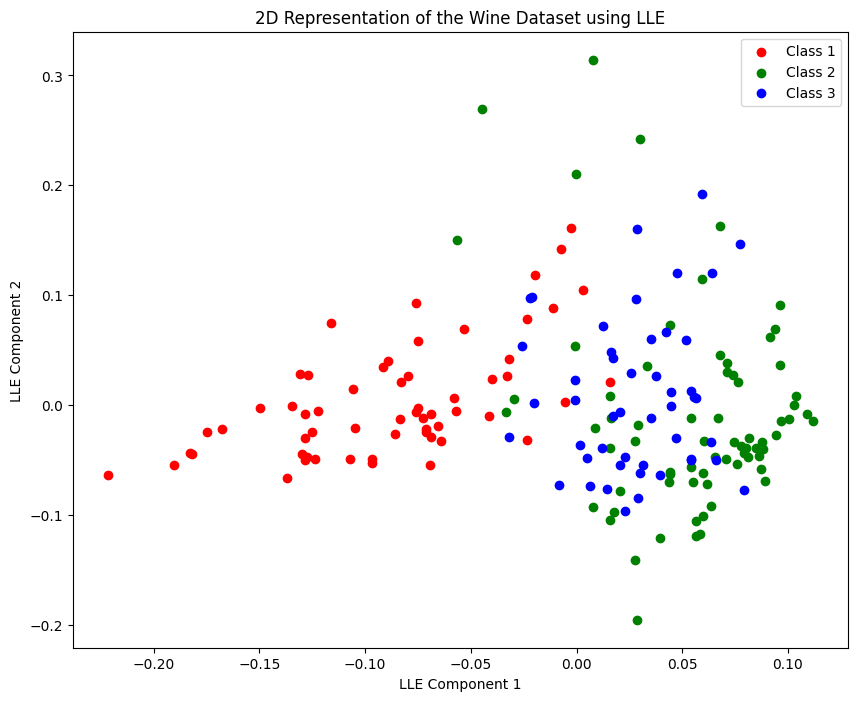

In [11]:
# Plotting the 2D representation of the dataset with distinct colors for each class (just fixing the color legend from gradient to tricolor)
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for i in range(1, 4):
    plt.scatter(X_lle[wine_df['Class'] == i, 0], X_lle[wine_df['Class'] == i, 1], color=colors[i-1], label=f'Class {i}')
plt.title('2D Representation of the Wine Dataset using LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend()
plt.show()